In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [31]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 7)

In [33]:
X_train, X_test

(array([[    43, 133000],
        [    35,  73000],
        [    39,  42000],
        [    24,  32000],
        [    41,  72000],
        [    40,  71000],
        [    41,  30000],
        [    49,  39000],
        [    35,  23000],
        [    42,  90000],
        [    19,  85000],
        [    42,  54000],
        [    45, 131000],
        [    54,  26000],
        [    34,  72000],
        [    41,  79000],
        [    24,  19000],
        [    37,  79000],
        [    18,  86000],
        [    28,  59000],
        [    44, 139000],
        [    30,  62000],
        [    40,  57000],
        [    36, 118000],
        [    28,  37000],
        [    50,  44000],
        [    18,  68000],
        [    29,  80000],
        [    41,  72000],
        [    36, 144000],
        [    58,  38000],
        [    24,  55000],
        [    30,  49000],
        [    26,  43000],
        [    23,  66000],
        [    48, 141000],
        [    29,  75000],
        [    51, 134000],
        [   

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [36]:
classifier.predict(scaler.transform([[30, 87000]]))

array([0], dtype=int64)

In [37]:
classifier.score(X_test, y_test)

0.875

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[48  6]
 [ 4 22]]
0.875


In [40]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_test), y_test

0 0
1 1


C:\Users\Administrator\AppData\Local\Temp\ipykernel_30080\2678195573.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(("blue", "gray"))(i), label = j)


Text(0.5, 1.0, 'Logistic Regression')

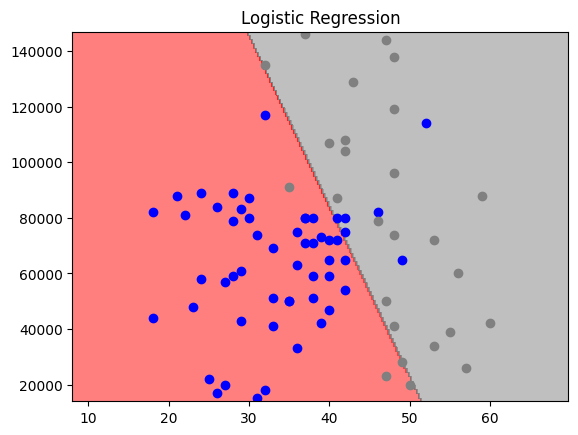

In [42]:
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-10, stop=X_set[:, 0].max()+10, step = 0.25), 
                     np.arange(start=X_set[:, 1].min()-1000, stop=X_set[:, 1].max()+1000, step = 25))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
             alpha = 0.5, cmap = ListedColormap(("red", "gray")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    print(i, j)
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(("blue", "gray"))(i), label = j)
plt.title("Logistic Regression")
